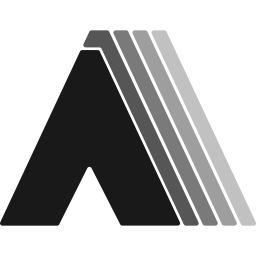

## DO NOT TRY TO GENERATE NSFW CONTENT , YOU'LL GET BANNED RIGHT AFTER THE MOMENT YOU CLICK GENERATE.


##### <span style="color:#B5E57C;">Create your Zrok Token</span> [**HERE**](https://www.kaggle.com/code/roguewild/create-zrok-account)
<span style="color:#B5E57C;">Simply wait for the zrok link to appear and use it to launch the WebUI.<br></span>

Or<br>

<span style="color:#B5E57C;">Use Ngrok</span> ( Create an account on https://ngrok.com/ and use your unique token )

### Thanks to [RougeWild](https://www.kaggle.com/code/roguewild/automatic1111-s-stable-diffusion)

### Make sure to turn on **accelerator**
1. Click Settings.
2. Click Accelerator.
3. Choose GPU T4 x2.

In [1]:
# - Paste your zrok or ngrok token below ( token = 'YOUR_TOKEN_HERE' ) - #

zrok_token = 'ZROK_API_KEY'

ngrok_token = '2aUlHeCFaeHadAehw9ZY1B1bHBY_4hVWv12qXzmfYKeHPWJtd'

civitai_api_key = 'CIVIT_API_KEY' # Optional, for the CivitAI Browser Plus. You can create your own API key in your CivitAI account settings.

arguments = '--theme dark --enable-insecure-extension-access --disable-safe-unpickle --no-hashing --skip-torch-cuda-test' # --xformers

# - Dependencies - #
!apt-get update
!apt -y install -qq aria2
# !pip install xformers
# !pip uninstall -y torch torchvision
# !pip install torch torchvision # ← Install if you have issues with CodeFormer
!python -m pip cache purge

from IPython.display import clear_output

# - Stable Diffusion WebUI - #
!git clone https://github.com/AUTOMATIC1111/stable-diffusion-webui

# --- MODELS, LORAS, VAE --- #
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://civitai.com/api/download/models/132760 -d /kaggle/working/stable-diffusion-webui/models/Stable-diffusion -o absolutereality_v181.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/stabilityai/sd-vae-ft-mse-original/resolve/main/vae-ft-mse-840000-ema-pruned.safetensors -d /kaggle/working/stable-diffusion-webui/models/VAE -o vae-ft-mse-840000-ema-pruned.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/hakurei/waifu-diffusion-v1-4/resolve/main/vae/kl-f8-anime2.ckpt -d /kaggle/working/stable-diffusion-webui/models/VAE -o kl-f8-anime2.ckpt

# --- UPSCALERS --- #
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/Zabin/Resizers/resolve/main/4x-UltraSharp.pth -d /kaggle/working/stable-diffusion-webui/models/ESRGAN -o 4x-UltraSharp.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/Zabin/Resizers/resolve/main/4x_foolhardy_Remacri.pth -d /kaggle/working/stable-diffusion-webui/models/ESRGAN -o 4x_foolhardy_Remacri.pth
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/gemasai/4x_NMKD-Superscale-SP_178000_G/resolve/main/4x_NMKD-Superscale-SP_178000_G.pth -d /kaggle/working/stable-diffusion-webui/models/ESRGAN -o 4x_NMKD-Superscale-SP_178000_G.pth

# --- EMBEDDINGS --- #
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/embed/negative/resolve/main/EasyNegative.pt -d /kaggle/working/stable-diffusion-webui/embeddings/Negative -o EasyNegative.pt
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/gsdf/Counterfeit-V3.0/resolve/main/embedding/EasyNegativeV2.safetensors -d /kaggle/working/stable-diffusion-webui/embeddings/Negative -o EasyNegativeV2.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/embed/negative/resolve/main/bad-hands-5.pt -d /kaggle/working/stable-diffusion-webui/embeddings/Negative -o bad-hands-5.pt
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/embed/negative/resolve/main/bad_prompt_version2.pt -d /kaggle/working/stable-diffusion-webui/embeddings/Negative -o bad_prompt_version2.pt
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/embed/negative/resolve/main/ng_deepnegative_v1_75t.pt -d /kaggle/working/stable-diffusion-webui/embeddings/Negative -o ng_deepnegative_v1_75t.pt
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ffxvs/negative-prompts-pack/resolve/main/bad-artist.pt -d /kaggle/working/stable-diffusion-webui/embeddings/Negative -o bad-artist.pt
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ffxvs/negative-prompts-pack/resolve/main/badhandv4.pt -d /kaggle/working/stable-diffusion-webui/embeddings/Negative -o badhandv4.pt
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ffxvs/negative-prompts-pack/resolve/main/verybadimagenegative_v1.3.pt -d /kaggle/working/stable-diffusion-webui/embeddings/Negative -o verybadimagenegative_v1.3.pt
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://civitai.com/api/download/models/60938 -d /kaggle/working/stable-diffusion-webui/embeddings/Negative -o negative_hand-neg.pt

# --- EXTENSIONS --- #
# !git clone https://github.com/deforum-art/deforum-for-automatic1111-webui /kaggle/working/stable-diffusion-webui/extensions/deforum-for-automatic1111-webui
!git clone https://github.com/zanllp/sd-webui-infinite-image-browsing /kaggle/working/stable-diffusion-webui/extensions/sd-webui-infinite-image-browsing
!git clone https://github.com/etherealxx/batchlinks-webui /kaggle/working/stable-diffusion-webui/extensions/batchlinks-webui
!git clone https://github.com/pkuliyi2015/multidiffusion-upscaler-for-automatic1111 /kaggle/working/stable-diffusion-webui/extensions/multidiffusion-upscaler-for-automatic1111
!git clone https://github.com/mcmonkeyprojects/sd-dynamic-thresholding /kaggle/working/stable-diffusion-webui/extensions/sd-dynamic-thresholding
!git clone https://github.com/DominikDoom/a1111-sd-webui-tagcomplete /kaggle/working/stable-diffusion-webui/extensions/a1111-sd-webui-tagcomplete
!git clone https://github.com/aka7774/sd_filer /kaggle/working/stable-diffusion-webui/extensions/sd_filer
!git clone https://github.com/Bing-su/adetailer /kaggle/working/stable-diffusion-webui/extensions/adetailer
!git clone https://github.com/thomasasfk/sd-webui-aspect-ratio-helper /kaggle/working/stable-diffusion-webui/extensions/sd-webui-aspect-ratio-helper
!git clone https://github.com/novitalabs/sd-webui-cleaner /kaggle/working/stable-diffusion-webui/extensions/sd-webui-cleaner
!git clone https://github.com/BlafKing/sd-civitai-browser-plus /kaggle/working/stable-diffusion-webui/extensions/sd-civitai-browser-plus

# ControlNet, if you need it → ( ↓ Sellect commented lines below and press "Ctrl + /" to uncomment all at once ↓ Or only the models you need, to save space )

# !git clone https://github.com/Mikubill/sd-webui-controlnet /kaggle/working/stable-diffusion-webui/extensions/sd-webui-controlnet
# !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/control_v11e_sd15_ip2p_fp16.safetensors -d /kaggle/working/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o control_v11e_sd15_ip2p_fp16.safetensors
# !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/control_v11e_sd15_shuffle_fp16.safetensors -d /kaggle/working/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o control_v11e_sd15_shuffle_fp16.safetensors
# !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/control_v11p_sd15_canny_fp16.safetensors -d /kaggle/working/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o control_v11p_sd15_canny_fp16.safetensors
# !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/control_v11p_sd15_depth_fp16.safetensors -d /kaggle/working/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o control_v11p_sd15_depth_fp16.safetensors
# !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/control_v11p_sd15_inpaint_fp16.safetensors -d /kaggle/working/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o control_v11p_sd15_inpaint_fp16.safetensors
# !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/control_v11p_sd15_lineart_fp16.safetensors -d /kaggle/working/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o control_v11p_sd15_lineart_fp16.safetensors
# !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/control_v11p_sd15_mlsd_fp16.safetensors -d /kaggle/working/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o control_v11p_sd15_mlsd_fp16.safetensors
# !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/control_v11p_sd15_normalbae_fp16.safetensors -d /kaggle/working/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o control_v11p_sd15_normalbae_fp16.safetensors
# !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/control_v11p_sd15_openpose_fp16.safetensors -d /kaggle/working/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o control_v11p_sd15_openpose_fp16.safetensors
# !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/control_v11p_sd15_scribble_fp16.safetensors -d /kaggle/working/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o control_v11p_sd15_scribble_fp16.safetensors
# !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/control_v11p_sd15_seg_fp16.safetensors -d /kaggle/working/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o control_v11p_sd15_seg_fp16.safetensors
# !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/control_v11p_sd15_softedge_fp16.safetensors -d /kaggle/working/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o control_v11p_sd15_softedge_fp16.safetensors
# !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/control_v11p_sd15s2_lineart_anime_fp16.safetensors -d /kaggle/working/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o control_v11p_sd15s2_lineart_anime_fp16.safetensors
# !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/control_v11u_sd15_tile_fp16.safetensors -d /kaggle/working/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o control_v11u_sd15_tile_fp16.safetensors
# !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/t2iadapter_style_sd14v1.pth -d /kaggle/working/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o t2iadapter_style_sd14v1.pth
# !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/t2iadapter_sketch_sd14v1.pth -d /kaggle/working/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o t2iadapter_sketch_sd14v1.pth
# !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/t2iadapter_seg_sd14v1.pth -d /kaggle/working/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o t2iadapter_seg_sd14v1.pth
# !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/t2iadapter_openpose_sd14v1.pth -d /kaggle/working/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o t2iadapter_openpose_sd14v1.pth
# !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/t2iadapter_keypose_sd14v1.pth -d /kaggle/working/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o t2iadapter_keypose_sd14v1.pth
# !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/t2iadapter_color_sd14v1.pth -d /kaggle/working/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o t2iadapter_color_sd14v1.pth
# !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/t2iadapter_canny_sd15v2.pth -d /kaggle/working/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o t2iadapter_canny_sd15v2.pth
# !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/t2iadapter_depth_sd15v2.pth -d /kaggle/working/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o t2iadapter_depth_sd15v2.pth
# !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/t2iadapter_sketch_sd15v2.pth -d /kaggle/working/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o t2iadapter_sketch_sd15v2.pth
# !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/ControlNet-v1-1/resolve/main/t2iadapter_zoedepth_sd15v1.pth -d /kaggle/working/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o t2iadapter_zoedepth_sd15v1.pth
# !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/monster-labs/control_v1p_sd15_qrcode_monster/resolve/main/control_v1p_sd15_qrcode_monster.safetensors -d /kaggle/working/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o control_v1p_sd15_qrcode_monster.safetensors
# !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/monster-labs/control_v1p_sd15_qrcode_monster/resolve/main/v2/control_v1p_sd15_qrcode_monster_v2.safetensors -d /kaggle/working/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o control_v1p_sd15_qrcode_monster_v2.safetensors

%cd /kaggle/working/stable-diffusion-webui

# - UI Config - #
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/TNitro/ui-config/resolve/main/ui-config.json -d /kaggle/working/stable-diffusion-webui -o ui-config.json
!sed -i -e 's/\["sd_model_checkpoint"\],/\["sd_model_checkpoint","sd_vae","CLIP_stop_at_last_layers"\],/g' /kaggle/working/stable-diffusion-webui/modules/shared_options.py
!sed -i -e 's/"\[seed\]"/"\[model_name\],\[seed\]"/g' /kaggle/working/stable-diffusion-webui/modules/images.py
!sed -i -e 's/"txt2img\/Negative prompt\/value": "",/"txt2img\/Negative prompt\/value": "(low quality:1.1), (worst quality:1.1), (bad quality:1.1), lowres,",/g' /kaggle/working/stable-diffusion-webui/ui-config.json

if civitai_api_key:
    !cp /kaggle/input/config/config.json /kaggle/working/stable-diffusion-webui
    !sed -i -e 's/"custom_api_key": ""/"custom_api_key": "{civitai_api_key}"/g' /kaggle/working/stable-diffusion-webui/config.json
else:
    pass

# - Lobe Theme - #
!git clone https://github.com/canisminor1990/sd-webui-lobe-theme /kaggle/working/stable-diffusion-webui/extensions/sd-webui-lobe-theme

# - Run - #
clear_output()

In [2]:
%cd /kaggle/working/stable-diffusion-webui/models
%ls

/kaggle/working/stable-diffusion-webui/models
ESRGAN/  Stable-diffusion/  VAE/  VAE-approx/  deepbooru/  karlo/


In [3]:
!mkdir Lora
%ls

ESRGAN/  Lora/  Stable-diffusion/  VAE/  VAE-approx/  deepbooru/  karlo/


In [4]:
%cd /kaggle/working/stable-diffusion-webui

/kaggle/working/stable-diffusion-webui


In [5]:
!cp -r your_lora_path /kaggle/working/stable-diffusion-webui/models/Lora

cp: cannot stat 'your_lora_path': No such file or directory


In [6]:
%ls

CHANGELOG.md           javascript/                scripts/
CITATION.cff           launch.py                  style.css
CODEOWNERS             localizations/             test/
LICENSE.txt            models/                    textual_inversion_templates/
README.md              modules/                   ui-config.json
_typos.toml            package.json               webui-macos-env.sh
config.json            pyproject.toml             webui-user.bat
configs/               requirements-test.txt      webui-user.sh
embeddings/            requirements.txt           webui.bat
environment-wsl2.yaml  requirements_npu.txt       webui.py
extensions/            requirements_versions.txt  webui.sh*
extensions-builtin/    screenshot.png
html/                  script.js


In [ ]:
arguments += f' --ngrok {ngrok_token} '
!pip install pyngrok
%cd /kaggle/working/stable-diffusion-webui
!python launch.py {arguments}

/kaggle/working/stable-diffusion-webui
Python 3.10.14 | packaged by conda-forge | (main, Mar 20 2024, 12:45:18) [GCC 12.3.0]
Version: v1.10.1
Commit hash: 82a973c04367123ae98bd9abdf80d9eda9b910e2
Installing clip
Installing open_clip
Installing ngrok
Cloning assets into /kaggle/working/stable-diffusion-webui/repositories/stable-diffusion-webui-assets...
Cloning into '/kaggle/working/stable-diffusion-webui/repositories/stable-diffusion-webui-assets'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 20 (delta 0), reused 20 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (20/20), 132.70 KiB | 2.01 MiB/s, done.
Cloning Stable Diffusion into /kaggle/working/stable-diffusion-webui/repositories/stable-diffusion-stability-ai...
Cloning into '/kaggle/working/stable-diffusion-webui/repositories/stable-diffusion-stability-ai'...
remote: Enumerating objects: 580, done.
remote: Total 580 (d